# **Simple Exponential Smoothing**

1.   Used for Univariate data
2.   Parameter called Alpha which is a smoothing parameter
3.   SES is used to forecast future values by using weighted average of all previous values of TS.
4.   Used to predict series that have levels but no trends and seasonality.



In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
df = pd.read_csv(r'JPM.csv')

In [ ]:
#Making a copy of the data for Close column for train/split
X = df['Close']
test = X.iloc[-30:] #Data expected for last 30 days
train = X.iloc[:-30] #Last 30 days to evaluate prediction

#Function for calculating evaluatiob metrics to understand how far off our forecasts are against the actuals
#Closer to 0 better the model
#RMSE and MAPE are notable statistics measures used to check the accurcy of forecasting model.

def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') #how close a regression line is to a set of points.
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}') # average magnitude of the errors in a set of predictions.
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}') #square root of the avg of squared diff bet pred and actual obs
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}') #statistical measure of how accurate a forecast is.
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n') #proportion of variance in dependent variable by the independent variable

resu = []
temp_df = pd.DataFrame()
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE'])

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 6383.0959025116335
MAE is : 79.27649586162403
RMSE is : 79.894279535594
MAPE is : 65.575163400763
R2 is : -63.91298948359598

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 184.99266014912962
MAE is : 11.546614533240737
RMSE is : 13.601200687774945
MAPE is : 9.218700605026452
R2 is : -0.8812856310176689

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 242.40716607107112
MAE is : 13.174167870491578
RMSE is : 15.569430499253052
MAPE is : 10.461315268348132
R2 is : -1.4651633098177572

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 272.4311769493864
MAE is : 14.027345382817835
RMSE is : 16.505489297484832
MAPE is : 11.133238085164335
R2 is : -1.7704929386006452

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 284.32953365304536
MAE is : 14.352525860352538
RMSE is : 16.862073824208142
MAPE is : 11.390387516273984
R2 is : -1.8914934554

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handl

Evaluation metric results:-
MSE is : 286.89297225172
MAE is : 14.421209506377435
RMSE is : 16.937915227433393
MAPE is : 11.44470184853568
R2 is : -1.9175623827562491

Fitting for smoothing level= 0.6
Evaluation metric results:-
MSE is : 284.9787810600384
MAE is : 14.369966036074334
RMSE is : 16.881314553672603
MAPE is : 11.404179030756374
R2 is : -1.8980959867326006

Fitting for smoothing level= 0.7
Evaluation metric results:-
MSE is : 280.7246849301281
MAE is : 14.255133267025887
RMSE is : 16.754840641740763
MAPE is : 11.313370438993966
R2 is : -1.8548338923569831

Fitting for smoothing level= 0.8
Evaluation metric results:-
MSE is : 274.96335581674145
MAE is : 14.097458329617307
RMSE is : 16.582019051271814
MAPE is : 11.188682694015375
R2 is : -1.7962439695576649

Fitting for smoothing level= 0.9
Evaluation metric results:-
MSE is : 268.0384944763321
MAE is : 13.904496847913405
RMSE is : 16.37188121372532
MAPE is : 11.036090706875132
R2 is : -1.7258214883305736

Fitting for smoothing

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Evaluation metric results:-
MSE is : 260.19078110535565
MAE is : 13.680997166666668
RMSE is : 16.13043028270962
MAPE is : 10.859349420554674
R2 is : -1.6460140495421283



,smoothing parameter,RMSE
1,0.1,13.601201
2,0.2,15.569430
10,1.0,16.130430
9,0.9,16.371881
3,0.3,16.505489
8,0.8,16.582019
7,0.7,16.754841
4,0.4,16.862074
6,0.6,16.881315
5,0.5,16.937915


Evaluation metric results:-
MSE is : 260.19078110535565
MAE is : 13.680997166666668
RMSE is : 16.13043028270962
MAPE is : 10.859349420554674
R2 is : -1.6460140495421283

Evaluation metric results:-
MSE is : 265.1597257295683
MAE is : 13.823123161322151
RMSE is : 16.283725793858366
MAPE is : 10.971741218944997
R2 is : -1.696545806398417



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


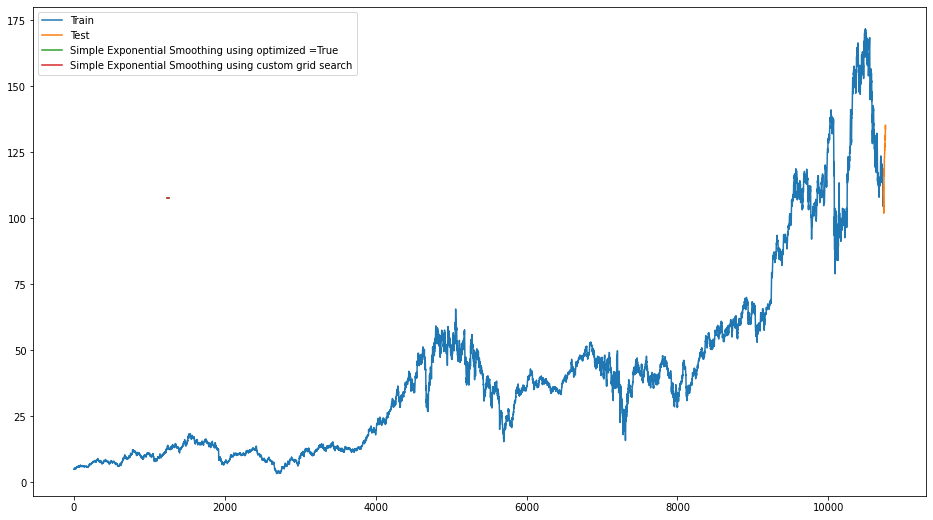

In [ ]:
#using values from grid search
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 1.0,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

#Automated smoothing_level
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(1229, 1259)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")

df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(1229, 1259)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()

# **Double Exponential Smoothing**

1.   Handles data that consumes trends and seasonality.
2.   This method adds a time trend equation in the formulation.
3.    Two smoothing parameters are used to update these two components at a time.
4.   Also calleed as Holt's exponential smoothing that contains level, trends but no seasonality.



In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
df = pd.read_csv(r'JPM_4_Yr.csv')
df.head()

train = df.Close[0:-30]
test = df.Close[-30:]

def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

from sklearn.model_selection import ParameterGrid
#dampening - decreasing future time trends on a straight line(no trend)
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))

df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','RMSE','r2'])
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    # print(smoothing_level, smoothing_slope, damping_slope,damped)
    fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    # print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    # print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


Streaming output truncated to the last 5000 lines.
<ipython-input-13-27ec937398f0>:33: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-13-27ec937398f0>:33: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-13-27ec937398f0>:33:

 Total time taken to complete grid search in seconds: 40.384501876


<ipython-input-13-27ec937398f0>:33: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-13-27ec937398f0>:33: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-13-27ec937398f0>:33: FutureWarning: the 'damped'' keyword is deprecated

 Below mentioned parameter gives least RMSE and r2
Evaluation metric results:-
MSE is : 2913.040343770082
MAE is : 47.37097925986441
RMSE is : 53.97258881849269
MAPE is : 36.87698236984609
R2 is : -30.565268046174086

Evaluation metric results:-
MSE is : 420.31896349932623
MAE is : 18.483487334401463
RMSE is : 20.50168196756857
MAPE is : 14.459670906616967
R2 is : -3.5545132171343035



<ipython-input-14-4e9e8abc567a>:3: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-14-4e9e8abc567a>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  

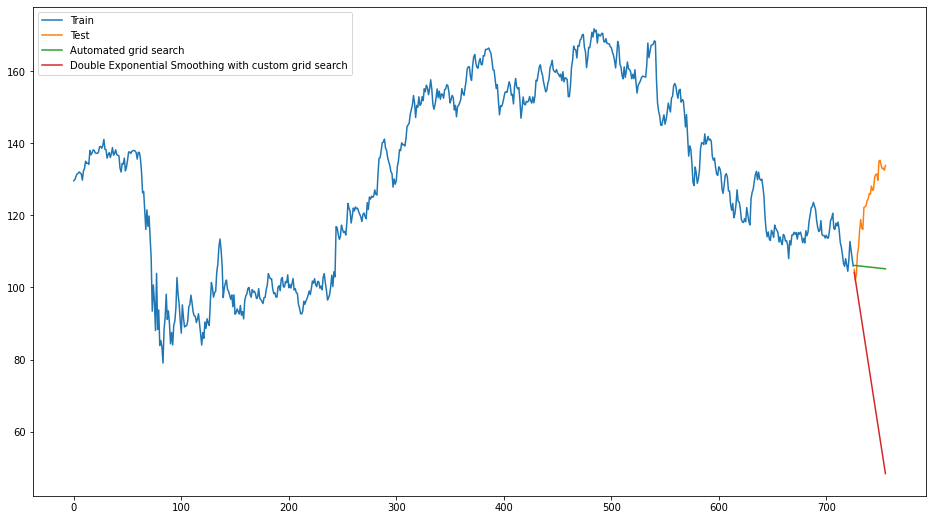

In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)

Forecast_custom_pred = fit1.forecast(30)

timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

# Automated Parameter
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)
fitESAUTO.summary()

fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()

# **Triple Exponential Smoothing**

1.   Also called as Holt Winter’s Exponential Smoothing.
2.   Forecasting method that enforces exponential smoothing three times.
3.   Method can be applies with levels, trends, seasonality and noise.



In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer

In [ ]:
df = pd.read_csv(r'JPM_4_Yr.csv')

X = df['Close']
test = X.iloc[-30:]
train = X.iloc[:-30]

def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

from sklearn.model_selection import ParameterGrid
param_grid = {'trend': ['add', 'mul'],'seasonal' :['add', 'mul'],'seasonal_periods':[3,6,12], 'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False], 'use_boxcox':[True, False],
             'remove_bias':[True, False],'use_basinhopping':[True, False]}
pg = list(ParameterGrid(param_grid))

df_results_moni = pd.DataFrame(columns=['trend','seasonal_periods','smoothing_level', 'smoothing_slope',
                                        'damping_slope','damped','use_boxcox','remove_bias','use_basinhopping','RMSE','r2'])
start = timer()
print('Starting Grid Search..')
for a,b in enumerate(pg):
    trend = b.get('trend')
    smoothing_level = b.get('smoothing_level')
    seasonal_periods = b.get('seasonal_periods')
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    use_boxcox = b.get('use_boxcox')
    remove_bias = b.get('remove_bias')
    use_basinhopping = b.get('use_basinhopping')
    #print(trend,smoothing_level, smoothing_slope,damping_slope,damped,use_boxcox,remove_bias,use_basinhopping)
    fit1 = ExponentialSmoothing(train,trend=trend, damped=damped,seasonal_periods=seasonal_periods ).fit(smoothing_level=smoothing_level,
                                    smoothing_slope=smoothing_slope, damping_slope = damping_slope,use_boxcox=use_boxcox,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    #print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    #print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'trend':trend,'seasonal_periods':seasonal_periods,'smoothing_level':smoothing_level, 'smoothing_slope':smoothing_slope,
                                        'damping_slope':damping_slope,'damped':damped,'use_boxcox':use_boxcox,'use_basinhopping':use_basinhopping,'RMSE':RMSE,'r2':r2}, ignore_index=True)
print('End of Grid Search')
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')

In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

fit1 = ExponentialSmoothing(train,trend='mul', damped=False,seasonal_periods=3 ).fit(smoothing_level=0.9,
                                    smoothing_slope=0.6, damping_slope = 0.6,use_boxcox=False,use_basinhopping = True,optimized=False)
Forecast_custom_pred = fit1.forecast(30)
fit1.summary()

timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

# Fitting model with optimized =True
fitESAUTO = ExponentialSmoothing(train).fit(optimized= True, use_brute = True)

fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Triple Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()